# Úkol č. 1 - vizualizace dat a web scraping (do 11. října)

  * V rámci tohoto úkolu musíte stáhnout dat z webu (tzv. _web scraping_, velmi základní) a následně data zpracovat a vizualizovat.
  * Cílem bude stáhnout data ze serveru https://www.psp.cz/sqw/hlasovani.sqw?o=8 týkající hlasování současné poslanecké sněmovny, uložit tato data v tabulkovém formátu a pak vymyslet vizualizace a zobrazení dat, které umožní orientaci v těchto datech a zvýrazní zajímavé informace a zobrazit přehledně časový vývoj různých veličin.
 
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

## Data

 * Měli byste stáhnout data ze všech hlasování současné poslanecké sněmovny (tj. od voleb v roce 2017) a to až na úroveň jednotlivých poslanců. 
 * Data by měla obsahovat i stručný popis toho, o jaké hlasování šlo.

## Pokyny k vypracování

**Základní body zadání**, za jejichž (poctivé) vypracování získáte **8 bodů**:
  * Strojově stáhněte data a uložte je do vhodného formátu, který se Vám bude dále dobře zpracovávat. 
  * **I když nemusíte mít sněmovnu rádi, snažte se nezahltit server a mezi požadavky na stránku mějte alespoň vteřinu mezeru.**
  * V druhé části Vašeho Jupyter notebooku pracujte se staženými daty v souborech, které jsou výsledkem Vašeho stahovacího skriptu (aby opravující nemusel spouštět stahování z webu).
  * S využitím vybraných nástrojů zpracujte data a vymyslete vizualizace a grafy, aby bylo vidět následující:
    * Odchody a přeběhnutí poslanců mezi jednotlivými stranami.
    * Jakou mají jednotliví poslanci docházku (účast na hlasování) a jak jsou na tom s docházkou strany jako celek.
    * Jak často spolu jednotlivé strany hlasují ve shodě a jak často hlasují odlišně.
    * Jak jsou poslanci jednotlivých stran jednotní v hlasování (jak často hlasují stejně, kdo jsou největší rebelové).

**Další body zadání** za případné další body (můžete si vybrat, maximum bodů za úkol je každopádně 12 bodů):
  * Ve vizualizacích a grafech nějak zachyťte časový vývoj (např. jak se mění docházka, shoda mezi stranami atp.).
  * Najděte jednotlivé poslance, kteří se nejvíce shodují při svém hlasování či kteří mají co nejpodobnější účast na hlasování.
  * Zkuste rozlišit v datech důležitá hlasování a zpracujte vizualizace (také) pro ně.
  * Zkuste najít hlasování, kde poslanci hlasovali nejvíce jinak, než obvykle.
  
## Tipy a triky
  * Balíčky iportujte na začátku notebooku (příp. na začátku scrapovací a pak na začátku vizualizační části).
  * Využívejte markdown buňky (jako je ta, ve které je tento text) a naspisy, abyste usnadnily orientaci opravující(mu).
  * Pečlivě si vybírejte grafy a vizualizace, aby co nejlépe vyjádřily to, co vyjádřit chcete. Doporučuji projít si pro inspiraci alespoň galerie balíčků `matplotlib` a `seaborn`.

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html.
  * Odevzdejte Jupyter Notebook (příp. doplněn skripty), ale i soubor(y) se staženými daty (ať opravující nemusí stahovat data).
  * Opravující Vám může umožnit úkol dodělat či opravit a získat tak další body. První verze je ale důležitá a bude-li odbytá, budete za to penalizováni.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bez násl. řádku někdy nefunguje vykreslování grafů v Jupyter noteboocích
%matplotlib inline 
import matplotlib
matplotlib.style.use('ggplot')

In [65]:
dfMeeting = pd.read_csv("meeting.csv", encoding='windows-1250')
dfMeeting['votingDate'] = pd.to_datetime(dfMeeting['votingDate'], format='%d. %m. %Y %H:%M')
dfVote = pd.read_csv("vote.csv", encoding='windows-1250')
dfMeeting


,topicID,topicName,meetingNum,votingDate
0,0,Inf. o ustavení volební komise PS a volbě členů,1,2017-11-20 13:53:00
1,1,Inf. o ustavení volební komise PS a volbě členů,1,2017-11-20 13:53:00
2,2,Procedurální hlasování,1,2017-11-20 14:47:00
3,3,Náv.na stanovení počtu čl. MIV,1,2017-11-20 15:39:00
4,4,Náv.na stanovení počtu čl. MIV,1,2017-11-20 15:39:00
...,...,...,...,...
6978,6978,Novela z. o Vojenském zpravodajství (sněmovní ...,61,2020-10-07 17:54:00
6979,6979,Novela z. - občanský soudní řád (sněmovní tisk...,61,2020-10-07 18:43:00
6980,6980,Novela z. - občanský soudní řád (sněmovní tisk...,61,2020-10-07 18:44:00
6981,6981,Novela z. o platu představitelů státní moci (s...,61,2020-10-07 19:23:00


Stažená data jsou v formatu .csv. Data jsem vytáhl pomocí skriptu scrapper.py. Jak lze vidět, tabulka má skoro 1milion záznamů. Jedná se o schůze **1-61**.

Každý záznam tabulky **dfMeeting** ukládá jednotlivá témata hlasování. Jedná se o:
* ID tematu:
* Tema: stručný popis navrhu
* meetingNum: číslo schůze během kterého se hlasovalo
* votingDate: den a čas hlasování

**dfVote** obsahuje:
* name: jmeno a prijmeni poslance
* political party
* topic ID: id pomoci ktereho se sparuje zbytek informaci z dataframu dfMeeting
* vote: jak poslanec odhlasoval navrh

Kvůli pamětovým problémům jsem musel pri skrappování rozdělit data do 2 souborů, to ale nevadí, pomocí merge můžeme data zpátky spojit. Dalsi promenne jsou k priprave pro pozdejsi zpracovani 

In [66]:
df = dfVote.merge(dfMeeting, on='topicID', how='left', right_index=True)
typesOfVotes = df['vote'].unique().tolist()
poslanci = df['name'].unique().tolist()
parties = df['political party'].unique().tolist()
df

,name,political party,topicID,vote,topicName,meetingNum,votingDate
0,Věra Adámková,ANO,0,yes,Inf. o ustavení volební komise PS a volbě členů,1,2017-11-20 13:53:00
1,Andrej Babiš,ANO,0,yes,Inf. o ustavení volební komise PS a volbě členů,1,2017-11-20 13:53:00
2,Andrea Babišová,ANO,0,yes,Inf. o ustavení volební komise PS a volbě členů,1,2017-11-20 13:53:00
3,Margita Balaštíková,ANO,0,yes,Inf. o ustavení volební komise PS a volbě členů,1,2017-11-20 13:53:00
4,Josef Bělica,ANO,0,yes,Inf. o ustavení volební komise PS a volbě členů,1,2017-11-20 13:53:00
...,...,...,...,...,...,...,...
1395995,Tereza Hyťhová,Nezařaz,6982,excused,Novela z. o platu představitelů státní moci (s...,61,2020-10-07 19:24:00
1395996,Václav Klaus,Nezařaz,6982,excused,Novela z. o platu představitelů státní moci (s...,61,2020-10-07 19:24:00
1395997,Zuzana Majerová Zahradníková,Nezařaz,6982,excused,Novela z. o platu představitelů státní moci (s...,61,2020-10-07 19:24:00
1395998,Ivana Nevludová,Nezařaz,6982,excused,Novela z. o platu představitelů státní moci (s...,61,2020-10-07 19:24:00


# ukol 1

* Nejdriv si vypisu jmena poslancu, kteri zmenili stranu a take mnozinu stran, kterych byli soucasti
* textova podoba neni ale prilis vypovidajici, proto pod jsem take vytvoril kolacovy graf, jednotliva % rikaji, jak dlouho byli soucasti jake politicke strany

In [56]:
peopleThatChanged = []
for poslanec in poslanci:
    poslanecDF = df[df['name'] == poslanec]
    parties = (poslanecDF['political party']).unique().tolist()
    if(len(parties) > 1):
        print(poslanec, parties)
        peopleThatChanged.append( (poslanec, parties))

Václav Klaus ['ODS', 'Nezařaz']
Zuzana Majerová Zahradníková ['ODS', 'Nezařaz']
Marian Bojko ['SPD', 'Nezařaz']
Tereza Hyťhová ['SPD', 'Nezařaz']
Ivana Nevludová ['SPD', 'Nezařaz']
Lubomír Volný ['SPD', 'Nezařaz']
Jaroslav Foldyna ['ČSSD', 'SPD', 'Nezařaz']


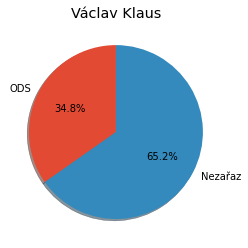

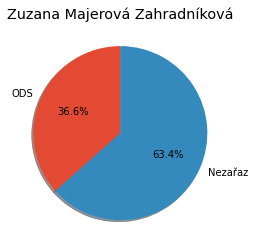

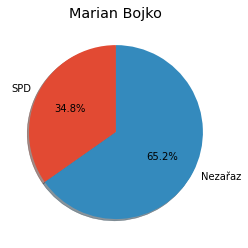

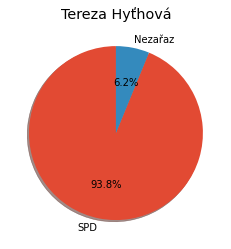

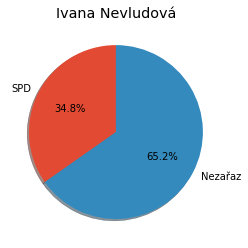

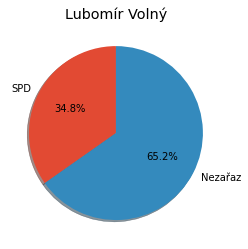

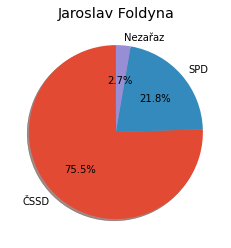

In [57]:
for poslanec in peopleThatChanged:
    poslanecDF = df[df['name'] == poslanec[0]]
    total = len(poslanecDF.index)
    size = []
    for party in poslanec[1]:
        size.append( len(poslanecDF[poslanecDF['political party'] == party].index) * 100 / total )
    
    fig1, ax1 = plt.subplots()
    ax1.pie(size, labels = poslanec[1],  autopct='%1.1f%%', shadow=True, startangle=90)
    plt.title(poslanec[0])
plt.show()

# ukol 2

In [58]:
# DA == didntAttend
DAlist = ['not-logged-in', 'excused']
DADF = df[df['vote'].isin( DAlist)]

* nejdříve docházka jednotlivých politiků. Grafy jsou rozdělené podlě politických stran a docházka je seřazená od "nejpracovitějších" k "nejlínějším". U grafů kde je příliš mnoho politiků jsem labely schoval, jinak by se překrývaly a nebyly by čitelné

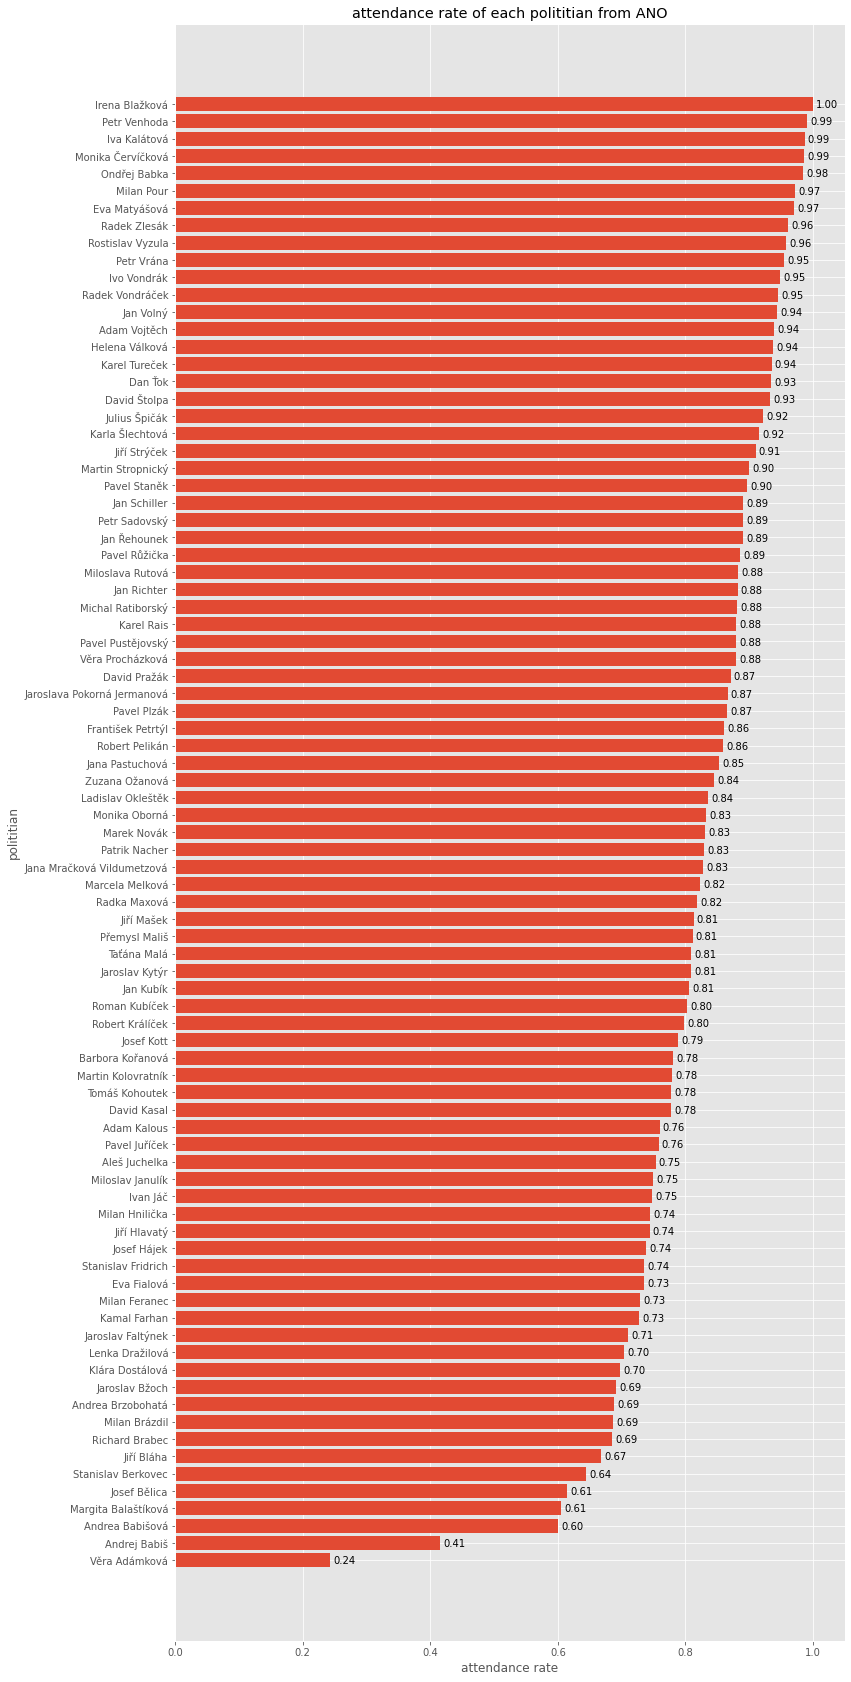

In [59]:
for party in parties:
    tmpdf = df[df['political party'] == party]
    val = []
    name = []
    peopleList = tmpdf['name'].unique().tolist()
    for person in peopleList:
        attendancedf = tmpdf[tmpdf['name'] == person]
        DAsize = len(attendancedf[attendancedf['vote'].isin(DAlist)])
        total = len(attendancedf.index)
        val.append(0 if (total == 0) else 1- DAsize/total)
        name.append(person)

    val.sort()
    plt.figure(figsize=(12, max(7, 7*len(peopleList)/20)))
    plt.barh(range(1, 1 + len(peopleList)), val, tick_label = name)
    
    #displays value next to the bar for better visibility
    for i, v in enumerate(val):
        plt.text(v + .005, i+ 0.8, '{:.2f}'.format(v))
    
    plt.xlabel('attendance rate')
    plt.ylabel('polititian')
    plt.title('attendance rate of each polititian from ' + party)
    plt.show()

* jako další je koláčový graf docházky jednotlivých politických stran. Dle zadání jsem vytáhl námi zajímané hodnoty a to, kdy osoba nedorazila. Také navíc ukazuje jak jako celek politická strana hlasuje. Velmi zajímavé je to např u Pirátů, v 70% hlasujou  kladně pro navrhovaný zákon.

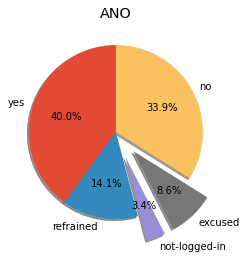

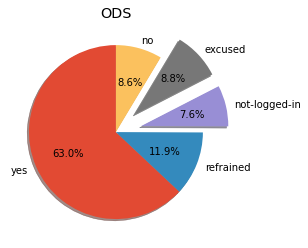

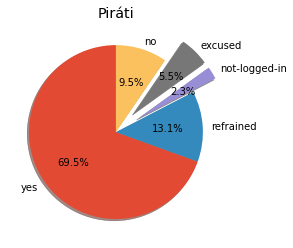

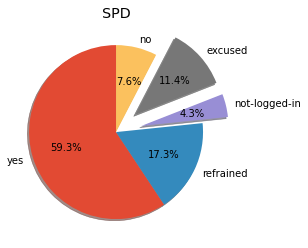

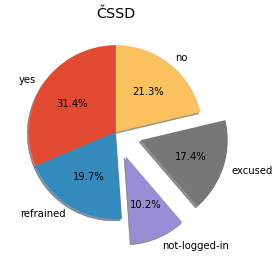

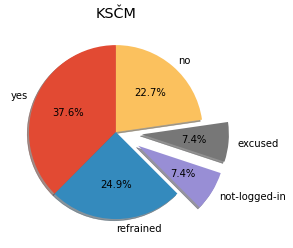

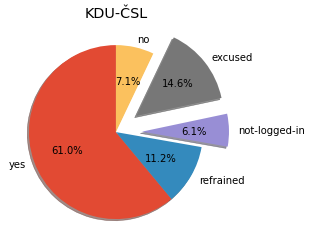

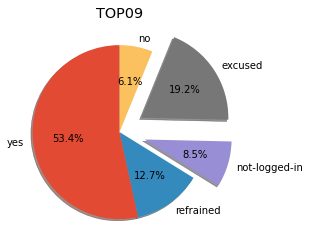

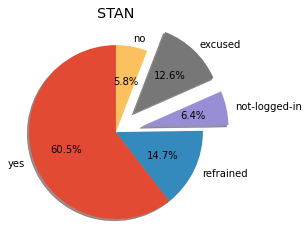

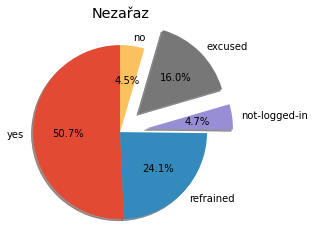

In [17]:
for party in parties:
    tmpdf = df[df['political party'] == party]
    totalSize = len(tmpdf.index)
    size = []
    for typeVote in typesOfVotes:
        size.append(len(tmpdf[tmpdf['vote'] == typeVote].index)*100/totalSize)
    fig1, ax1 = plt.subplots()
    explode = (0, 0, 0.3, 0.3, 0) 
    
    ax1.pie(size, explode = explode, labels = typesOfVotes,  autopct='%1.1f%%', shadow=True, startangle=90)
    plt.title(party)
    
plt.show()

* poslenim grafem pro ukol 2 je casovy prubeh dochazky u jednotlivych politickych stran, data jsou casove rozdelena podle cislo schuze mist datumu

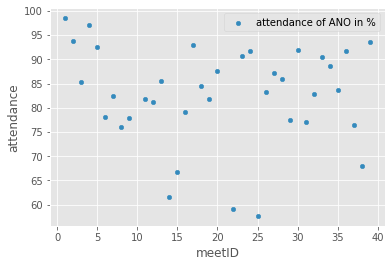

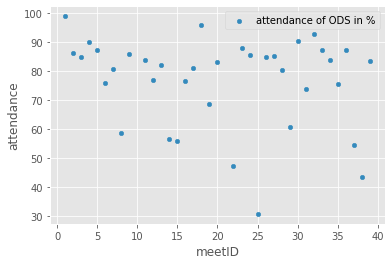

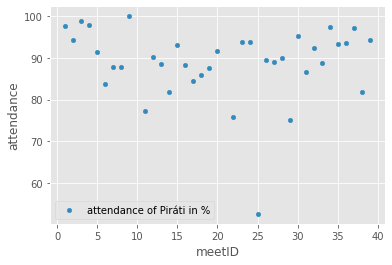

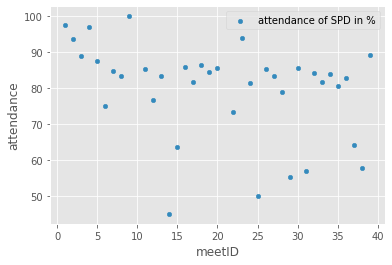

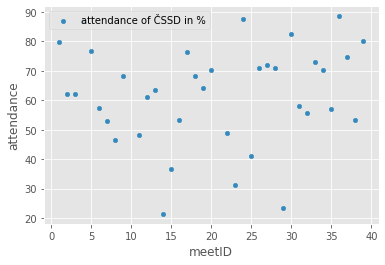

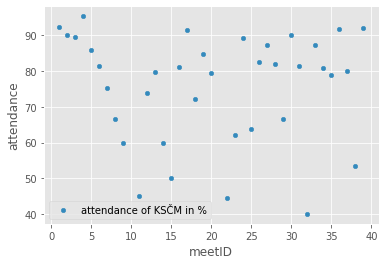

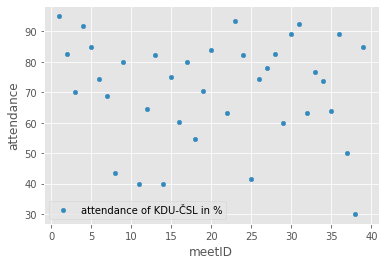

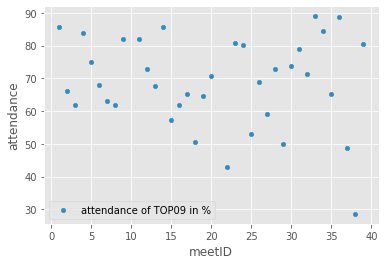

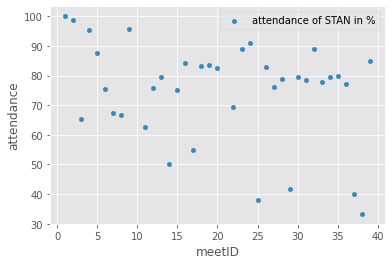

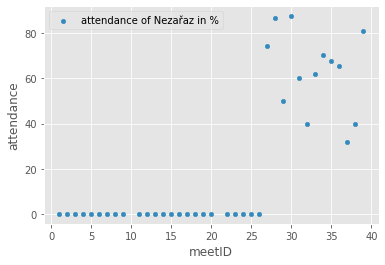

In [18]:
for party in parties:
    tmpdf = df[df['political party'] == party]
    d=[]
    for meet in df['meetingNum'].unique().tolist():
        timeMeetdf = tmpdf[tmpdf['meetingNum'] == meet]
        amountDA =len(timeMeetdf[timeMeetdf['vote'].isin(DAlist)].index)
        total = len(timeMeetdf.index)
        val = 0 if(total == 0) else (1 - amountDA/total)*100
        d.append( (meet, val ))
             
    attendanceDF = pd.DataFrame.from_records(d, columns=['meetID', 'attendance'])
    attendanceDF.plot.scatter(x='meetID', y='attendance', label = 'attendance of '+party+ ' in %')
    plt.show()
    

# ukol 3

In [60]:
def getVote(party, topicID) :
    maxVal = (typesOfVotes[1], -1)
    _tmpiddf = df[df['topicID'] == topicID]
    _partyVoteDF = _tmpiddf[_tmpiddf['political party'] == party]
    _d = {}
    for v in _partyVoteDF['vote'].unique():
        _d[v] = 0
    for index, i in _partyVoteDF.iterrows():
        _d[i['vote']] += 1
        
    for i in _d:
        if _d[i] > maxVal[1]:
            maxVal = (i, _d[i])
    return maxVal[0]

In [70]:
d = {}
for party in parties:
    l = []
    for topic in df['topicID'].unique():
        res = getVote(party, topic)
        l.append(2 if(res == "") else typesOfVotes.index(res))
    d[party] = l


In [69]:
d

{'ANO': [0,
  0,
  4,
  4,
  0,
  0,
  0,
  0,
  4,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  4,
  0,
  4,
  0,
  4,
  0,
  4,
  0,
  4,
  0,
  4,
  0,
  4,
  0,
  4,
  0,
  4,
  0,
  4,
  0,
  0,
  0,
  0,
  1,
  4,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  4,
  0,
  0,
  0,
  0,
  4,
  4,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  4,
  4,
  4,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  4,
  0,
  0,
  4,
  0,
  4,
  4,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4

In [71]:
corrDF = pd.DataFrame.from_dict(d)
corrDF

,ANO,ODS,Piráti,SPD,ČSSD,KSČM,KDU-ČSL,TOP09,STAN,Nezařaz
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1
2,4,0,4,4,0,1,0,0,0,1
3,4,1,0,1,4,1,0,0,0,1
4,0,0,4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
6975,3,3,3,0,3,3,3,3,3,3
6976,3,3,3,3,3,0,3,3,3,3
6977,3,3,3,0,3,0,3,3,3,3
6978,3,3,3,0,3,3,3,3,3,3


In [82]:
corr_mat =  pd.DataFrame.from_dict(d).corr()
print("top 3")
display(corr_mat.unstack().sort_values(ascending=False).drop_duplicates()[1:4]) #1 to 4 because 1st correlation of a political side with itself which has value 1 - uninteresting

print("bottom 3")
display(corr_mat.unstack().sort_values().drop_duplicates()[:3])

top 3


KSČM  ANO     0.722969
ČSSD  ANO     0.626441
KSČM  ČSSD    0.591684
dtype: float64

bottom 3


ANO    Nezařaz   -0.058407
STAN   KSČM      -0.024522
TOP09  KSČM      -0.021412
dtype: float64

* pomoci heat mapy lze zjistit velmi snadno jak casto spolu jednotlivé strany hlasují ve shode

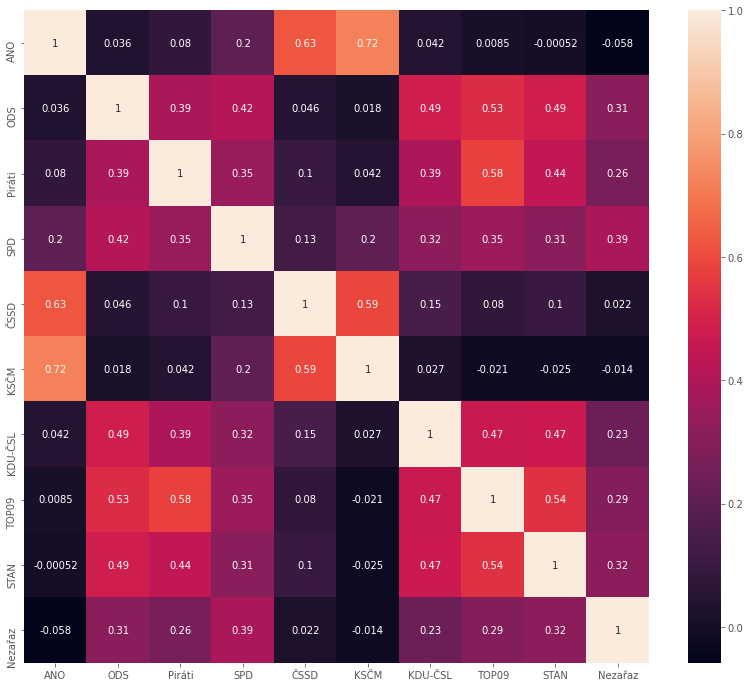

In [73]:
plt.figure(figsize=(14,12))
sns.heatmap(corr_mat, annot=True)
plt.show()

# ukol 4

Pomoci scatterlot jsem vytvoril graf, ktery poukazuje jak jednotni jsou jednotlive strany. Jednotive body v grafu predstavuji dvojici (topicID, % majority hlasovanych ku vsem hlasovanym v 1 politicke strane)

z Grafu lze zpozorovat napr okolo topicID 3000 se vetsina ze stran ANO shodla na nejakem rozhodnuti, to stejne u ODS nebo Piratu.

Graf ANO take vypada take "hustseji" oproti ostatnim grafum, to je dano tim, ze Ano ma mnohem vic poslancu a procentualne muze tedy majorita nabyvat vice hodnot (vetsina / vsech hlasu strany). STAN naopak ma vyrazne mene poslancu a tedy muze y-hodnoty grafu nabyvate mene hodnot.

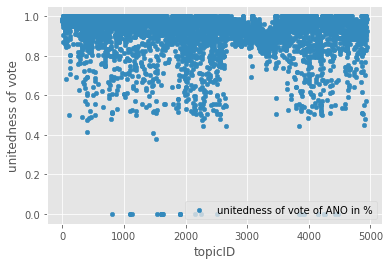

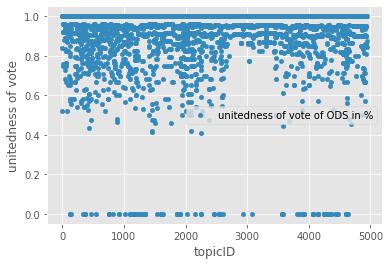

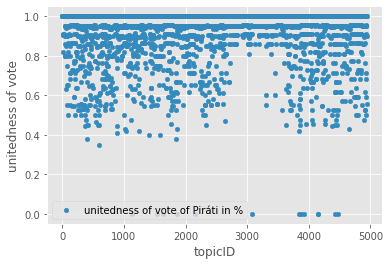

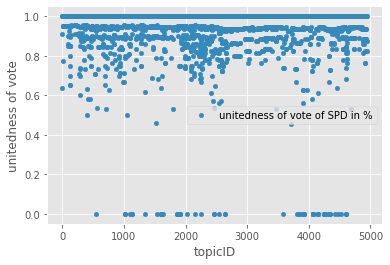

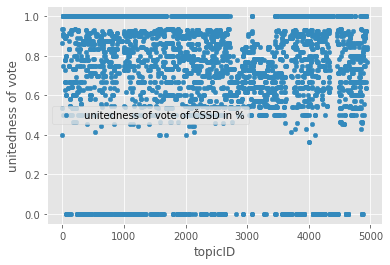

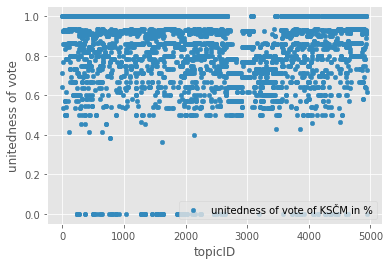

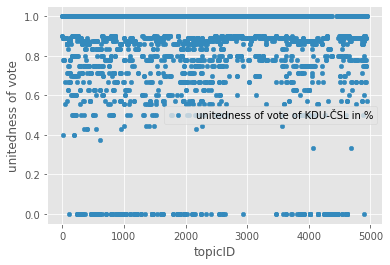

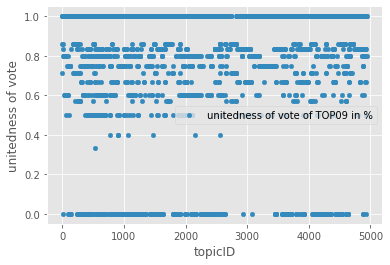

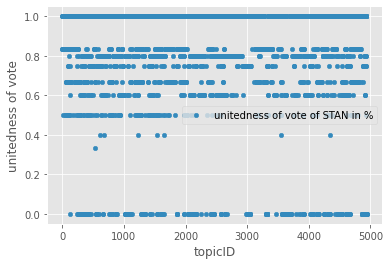

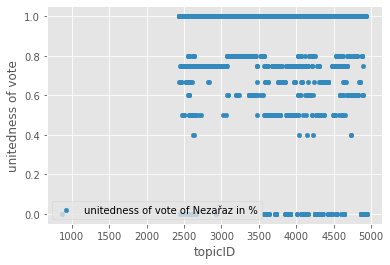

In [89]:
for party in parties:
    partyDF = df[df['political party'] == party]
    d = []
    for meet in partyDF['topicID'].unique().tolist():
        partyVoteDF = partyDF[ (partyDF['topicID'] == meet) & (~partyDF['vote'].isin(DAlist))]
        total = len(partyVoteDF.index)
        
        
        result = getVote(party, meet)
        sameVote = len( partyVoteDF[partyVoteDF['vote'] == result] )
        val = 0 if(total ==0) else sameVote/total
        
        d.append((meet, val))
        
        #searches for people in political party that didnt voted differently than the majority from their own party
        #for index, person in partyVoteDF[partyVoteDF['vote'] != maxVal[1]].iterrows():
            #print('in meeting', person['topicID'], person['name'], 'voted', person['vote'], 'instead of', maxVal[1])
            
    voteDF = pd.DataFrame.from_records(d, columns=['topicID', 'unitedness of vote'])
    voteDF.plot.scatter(x='topicID', y='unitedness of vote', label = 'unitedness of vote of '+party+ ' in %')
    plt.show()   
